In [1]:
%cd ..

/home/tianshu/prediction


In [2]:
import json
import numpy as np
import os
from matplotlib import pyplot as plt
from matplotlib.pyplot import Line2D
from tqdm.notebook import tqdm

from forecast import Dataset, Method

In [9]:
ds = Dataset("data.npz", if_data="if2.npz", offset=1000. * 1000.)

with open("results/manifest.json") as f:
    methods = json.load(f)
    
results = {
    method: Method("results/{}".format(method), ds, desc)
    for method, desc in tqdm(methods.items())
}

  0%|          | 0/27 [00:00<?, ?it/s]

In [10]:
def plots(subset, ax=None, boxplot=True, baseline=True, key="error", labels={}):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 6))
        
    colors = ["C{}".format(i + 1) for i in range(len(subset))]
    legend = [labels.get(m, methods.get(m)) for m in subset]
    for color, method in zip(colors, subset):
        results[method].compare(ax, color=color, boxplot=boxplot, key=key)

    if baseline:
        colors = ["C0"] + colors
        legend = ["Baseline"] + legend
        results["Lr8"].compare(ax, color='C0', boxplot=boxplot, key="baseline")
        
    ax.legend([Line2D([0], [0], color=c, lw=2) for c in colors], legend)

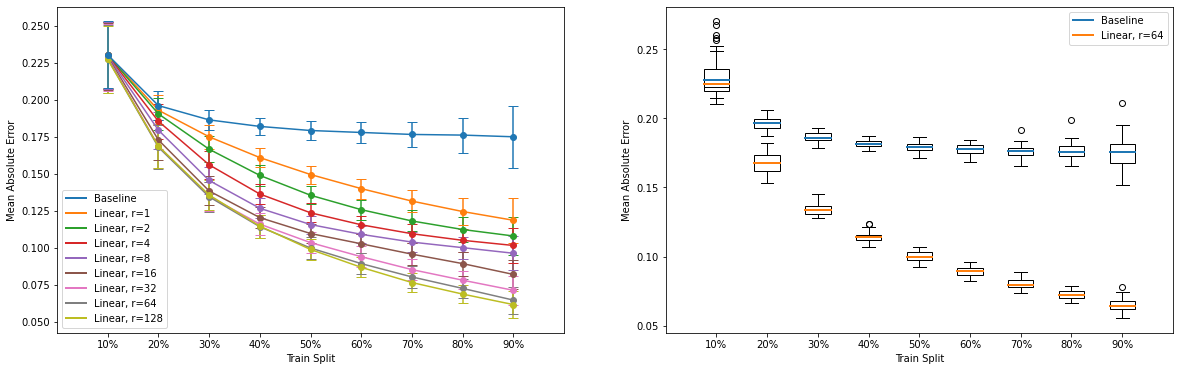

In [9]:
# Ablation: Linear Dimension

def _ablation_linear_r():
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))
    plots(
        ["Lr{}".format(r) for r in [1, 2, 4, 8, 16, 32, 64, 128]],
        ax=axs[0], boxplot=False)
    plots(["Lr64"], ax=axs[1], baseline=True, boxplot=True)

_ablation_linear_r()

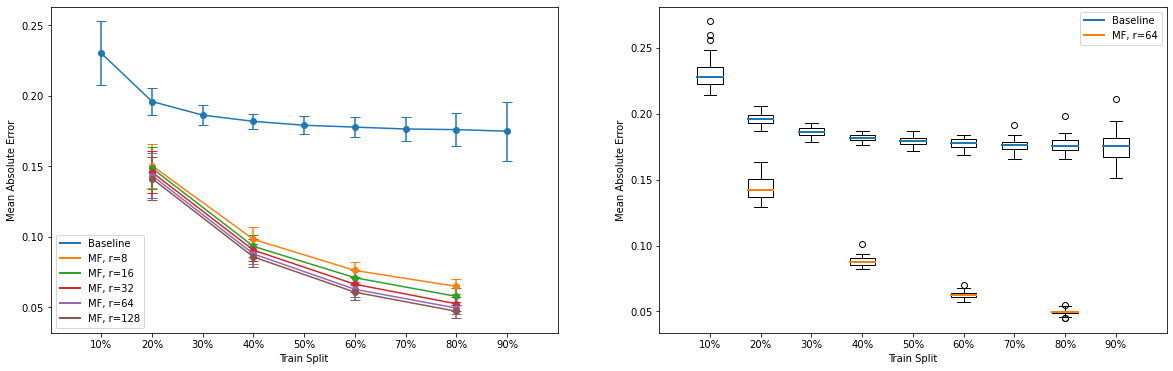

In [12]:
# Ablation: Embedding Dimension

def _ablation_embedding_r():
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))
    plots(
        ["Er{}".format(r) for r in [8, 16, 32, 64, 128]],
        ax=axs[0], boxplot=False)
    plots(["Er64"], ax=axs[1], baseline=True, boxplot=True)

_ablation_embedding_r()

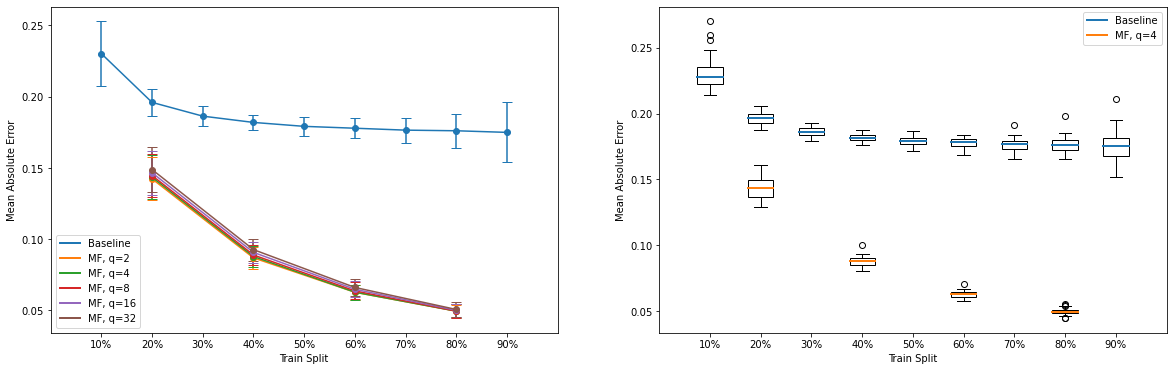

In [14]:
# Ablation: Embedding Learnable Input Features

def _ablation_embedding_q():
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))
    plots(
        ["Eq{}".format(r) for r in [2, 4, 8, 16, 32]],
        ax=axs[0], boxplot=False)
    plots(["Eq4"], ax=axs[1], baseline=True, boxplot=True)

_ablation_embedding_q()

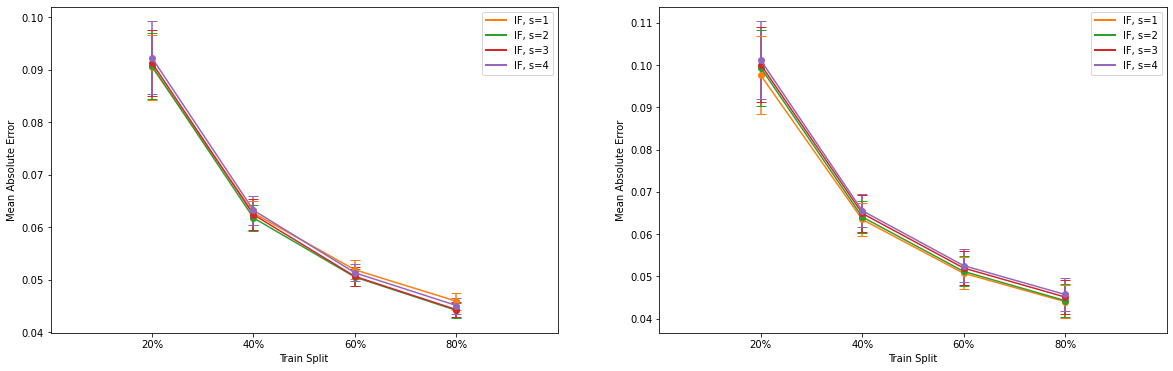

In [19]:
# Ablation: Interference Types

def _ablation_interference_s():
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))
    plots(
        ["Is{}".format(s) for s in [1, 2, 3, 4]],
        ax=axs[0], baseline=False, key="interference", boxplot=False)
    plots(
        ["Is{}".format(s) for s in [1, 2, 3, 4]],
        ax=axs[1], baseline=False, key="error", boxplot=False)

_ablation_interference_s()

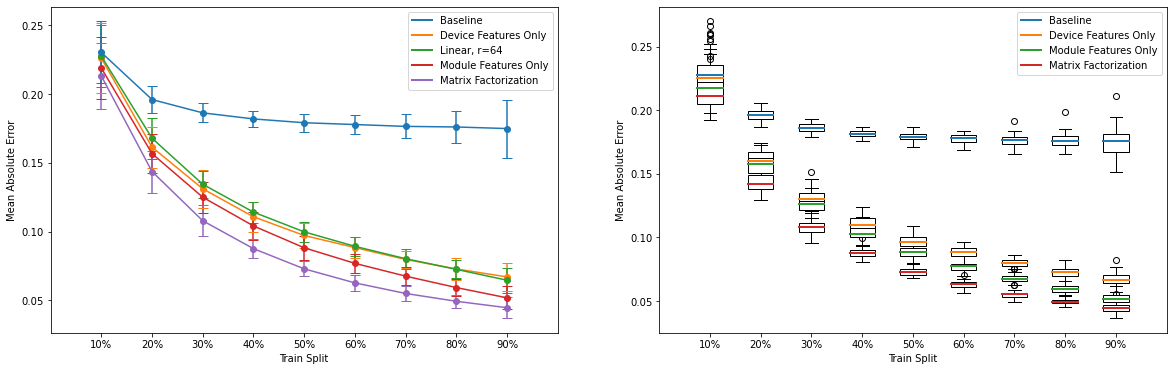

In [31]:
# Ablation: Input Features

def _ablation_features():
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))
    plots(
        ["device_only", "Lr64", "module_only", "embedding"],
        ax=axs[0], baseline=True, key="error", boxplot=False)
    plots(
        ["device_only", "module_only", "embedding"],
        ax=axs[1], baseline=True, key="error", boxplot=True)

_ablation_features()

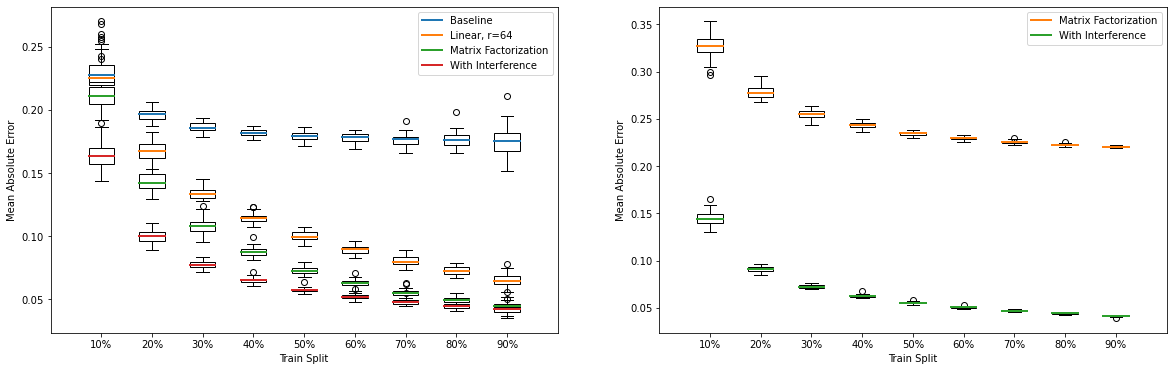

In [26]:
# Comparisons

def _compare():
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))
    plots(
        ["Lr64", "embedding", "interference"], ax=axs[0], baseline=True,
        boxplot=True, key="error")
    plots(
        ["embedding", "interference"], ax=axs[1], baseline=False,
        boxplot=True, key="interference")

_compare()